 # Step 1: Loading & preprocessing

In [33]:

import pandas as pd

# Load the uploaded CSV file
file_path = 'data/twitter_training.csv'
df = pd.read_csv(file_path)

In [34]:
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']
print(df[['ID', 'Entity', 'Sentiment', 'Text']].head())

print(df.info())




     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [35]:
df.to_csv("twitter_training_cleaned.csv", index=False)


 # Step 2: Preprocess text

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # remove hashtags
    text = re.sub(r'http\S+', '', text)         # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)        # remove non-letters

    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t, pos='v') for t in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['Text'].apply(clean_text)
print(df[['Text', 'clean_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                   clean_text  
0            come border kill  
1     im get borderlands kill  
2  im come borderlands murder  
3   im get borderlands murder  
4   im get borderlands murder  


# Step 3: Vectorize text (TF-IDF)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])


#  Step 4: Prepare target

In [15]:
y = df['Sentiment']


 # Step 5: Split & build model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.67      0.50      0.57      2661
    Negative       0.71      0.76      0.74      4471
     Neutral       0.60      0.64      0.62      3551
    Positive       0.69      0.71      0.70      4254

    accuracy                           0.67     14937
   macro avg       0.67      0.65      0.66     14937
weighted avg       0.67      0.67      0.67     14937

Confusion Matrix:
 [[1328  444  408  481]
 [ 186 3398  532  355]
 [ 243  518 2282  508]
 [ 233  412  569 3040]]


# Step 6: Predict example

In [17]:
example = ["I absolutely love the new Borderlands game!"]
example_clean = [clean_text(example[0])]
example_vec = vectorizer.transform(example_clean)

prediction = model.predict(example_vec)
print("\nPredicted sentiment:", prediction)



Predicted sentiment: ['Positive']


#  Random Forest (with bi-grams)

In [21]:
# ✅ Block 1: Random Forest with bi-grams

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# TF-IDF vectorizer with bi-grams
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['Sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# # Predict on validation set
# val_df['clean_text'] = val_df['Text'].apply(clean_text)
# X_val = vectorizer.transform(val_df['clean_text'])
# val_rf_preds = rf_model.predict(X_val)
# val_df['Pred_RF'] = val_rf_preds

# print(val_df[['Text', 'Pred_RF']].head())


Random Forest Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.93      0.78      0.85      2661
    Negative       0.89      0.88      0.89      4471
     Neutral       0.85      0.84      0.85      3551
    Positive       0.81      0.90      0.85      4254

    accuracy                           0.86     14937
   macro avg       0.87      0.85      0.86     14937
weighted avg       0.87      0.86      0.86     14937

Random Forest Confusion Matrix:
 [[2069  166  148  278]
 [  38 3956  183  294]
 [  49  168 3000  334]
 [  58  172  182 3842]]


In [29]:
df.columns

Index(['ID', 'Entity', 'Sentiment', 'Text', 'clean_text'], dtype='object')

In [28]:

import pickle

# Save model and vectorizer
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer saved!")


✅ Model and vectorizer saved!


#  XGBoost (with bi-grams)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Reuse same vectorizer
X = vectorizer.fit_transform(df['clean_text'])

# Encode y
le = LabelEncoder()
y_encoded = le.fit_transform(df['Sentiment'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

# Decode predictions for reporting
xgb_preds_decoded = le.inverse_transform(xgb_preds)
y_test_decoded = le.inverse_transform(y_test)

print("XGBoost Classification Report:\n", classification_report(y_test_decoded, xgb_preds_decoded))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test_decoded, xgb_preds_decoded))

# Predict on validation set
# X_val = vectorizer.transform(val_df['clean_text'])
# val_xgb_preds_encoded = xgb_model.predict(X_val)
# val_xgb_preds = le.inverse_transform(val_xgb_preds_encoded)

# val_df['Pred_XGB'] = val_xgb_preds

# print(val_df[['Text', 'Pred_XGB']].head())
 

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py:158: UserWarning: [18:30:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.78      0.35      0.48      2661
    Negative       0.56      0.85      0.68      4471
     Neutral       0.67      0.52      0.59      3551
    Positive       0.67      0.66      0.67      4254

    accuracy                           0.63     14937
   macro avg       0.67      0.60      0.60     14937
weighted avg       0.66      0.63      0.62     14937

XGBoost Confusion Matrix:
 [[ 934  910  291  526]
 [  70 3796  285  320]
 [ 111 1048 1857  535]
 [  89 1007  337 2821]]


| Metric        | Random Forest         | XGBoost    |
| ------------- | --------------------- | ---------- |
| Accuracy      | **86%**               | 63%        |
| Macro F1      | **0.86**              | 0.60       |
| Best Class    | Negative / Irrelevant | Negative   |
| Weakest Class | Irrelevant (recall)   | Irrelevant |


Your Random Forest model is clearly stronger right now on this feature set (TF-IDF with bigrams).

XGBoost struggled here probably because it is more sensitive to class imbalance and requires more hyperparameter tuning to match RF in this case.

 # Load & predict on validation dataset 

In [23]:
import pandas as pd

# 1️ Load validation dataset
val_file_path = 'data/twitter_validation.csv'
val_df = pd.read_csv(val_file_path)

# 2️ Rename columns for clarity
val_df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# 3️ Clean text (reuse the same clean_text function from before!)
val_df['clean_text'] = val_df['Text'].apply(clean_text)

# 4️ Vectorize using the trained TF-IDF vectorizer
X_val = vectorizer.transform(val_df['clean_text'])

# 5️ Predict using the trained Random Forest model
val_rf_preds = rf_model.predict(X_val)

# 6️ Attach predictions to the DataFrame
val_df['Predicted_Sentiment_RF'] = val_rf_preds

# 7 Preview
print(val_df[['Text', 'Predicted_Sentiment_RF']].head())

# Optional: Save to CSV
# val_df.to_csv("rf_validation_predictions.csv", index=False)


                                                Text Predicted_Sentiment_RF
0  BBC News - Amazon boss Jeff Bezos rejects clai...                Neutral
1  @Microsoft Why do I pay for WORD when it funct...               Negative
2  CSGO matchmaking is so full of closet hacking,...               Negative
3  Now the President is slapping Americans in the...                Neutral
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...               Negative


In [24]:
print(val_df['Predicted_Sentiment_RF'].value_counts())


Predicted_Sentiment_RF
Positive      288
Negative      272
Neutral       271
Irrelevant    168
Name: count, dtype: int64


 # Visualize the distribution

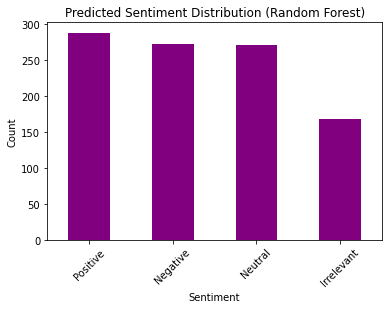

In [27]:

import matplotlib.pyplot as plt

val_df['Predicted_Sentiment_RF'].value_counts().plot(kind='bar', color='purple')
plt.title("Predicted Sentiment Distribution (Random Forest)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


The model predicts a fairly balanced distribution among Positive, Negative, and Neutral sentiments.

Slightly fewer tweets classified as Irrelevant — which is common because Irrelevant tweets often share vocabulary with Neutral or Negative sentiments, making them harder to catch confidently.

No major class skew, suggesting your model is not heavily biased toward a single sentiment.